In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

## 2.5R$_{\text{Eff}}$

In [2]:
# Column 0 for Jam result, Column 1 for dyLens 
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)  # Number of subhalos


Dstar  = np.empty([Nsubhalos,2])   # Fractional difference in stellar mass
Ddm    = np.empty([Nsubhalos,2])   # Fractional difference in dm mass
Dtotal = np.empty([Nsubhalos,2])   # Fractional difference in total mass
Dfdm   = np.empty([Nsubhalos,2])   # Fractional difference in dm fraction

Mstar  = np.empty([Nsubhalos]) # "True" stellar mass
Mdm    = np.empty([Nsubhalos]) # "True" dm mass
Mtotal = np.empty([Nsubhalos]) # "True" total mass

In [3]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/JAM/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        jam = json.load(f)
        f.close()

    with open("./{}/model1/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        dyLens = json.load(f)
        f.close()
    
    Dstar[i][0] = jam["Dstar"]
    Dstar[i][1] = dyLens["Dstar"]
    
    Ddm[i][0] = jam["Ddm"]
    Ddm[i][1] = dyLens["Ddm"]
    
    Dtotal[i][0] = jam["Dtotal"]
    Dtotal[i][1] = dyLens["Dtotal"]
    
    Dfdm[i][0] = jam["Dfdm"]
    Dfdm[i][1] = dyLens["Dfdm"]
    
    Mstar[i]  = dyLens["Mstar"]
    Mdm[i]    = dyLens["Mdm"]
    Mtotal[i] = dyLens["Mtotal"] 
    

In [4]:
results = np.stack([Dstar, Ddm, Dtotal, Dfdm])

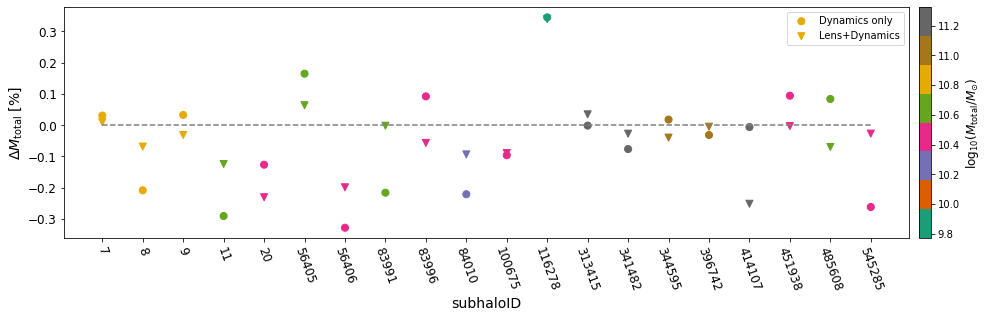

In [5]:
x = np.arange(0, Nsubhalos, 1)   # just to plot
plt.figure(figsize=(15,4))
cmap = "Dark2"
plt.xticks(x, subhalos)
plt.scatter(x, Dtotal[:,0], marker="o", s=50, c=Mtotal, label="Dynamics only", cmap=cmap)
plt.scatter(x, Dtotal[:,1], marker="v", s=50, c=Mtotal, label="Lens+Dynamics", cmap=cmap)

plt.hlines(y=0, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")

plt.legend()
plt.ylabel(r"${\Delta M_{\rm total}}$ [%]", size=14)
plt.xlabel("subhaloID", size=14)
plt.colorbar(pad=0.01).set_label(label=r"${\log_{10}(M_{\rm total}/M_{\odot})}$", size=12)
plt.tight_layout()
plt.xticks(size=12, rotation=-70)
plt.yticks(size=12)
plt.show()

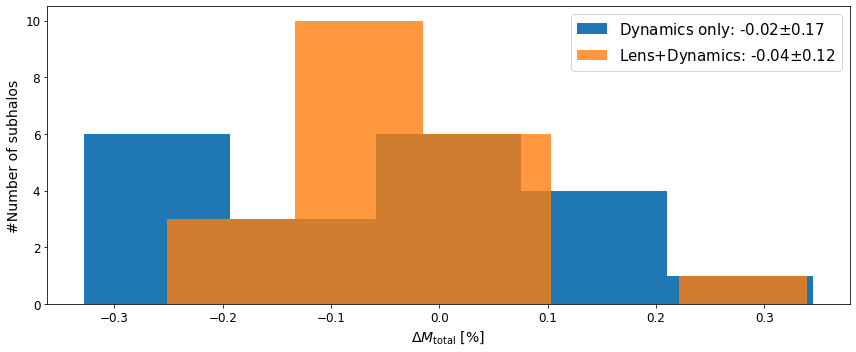

In [6]:
plt.figure(figsize=(12,5))
_ = plt.hist(Dtotal[:,0], bins=5, density=False, 
             label="Dynamics only: {:.2f}$\pm${:.2f}".format(np.median(Dtotal[:,0]) , np.std(Dtotal[:,0])))
_ = plt.hist(Dtotal[:,1], bins=5, density=False, alpha=0.8, 
             label="Lens+Dynamics: {:.2f}$\pm${:.2f}".format(np.median(Dtotal[:,1]) , np.std(Dtotal[:,1])) )

plt.legend(fontsize=15)
plt.xlabel(r"${\Delta M_{\rm total}}$ [%]", size=14)
plt.ylabel("#Number of subhalos", size=14)

plt.xticks(size=12)
plt.yticks(size=12)
plt.tight_layout()

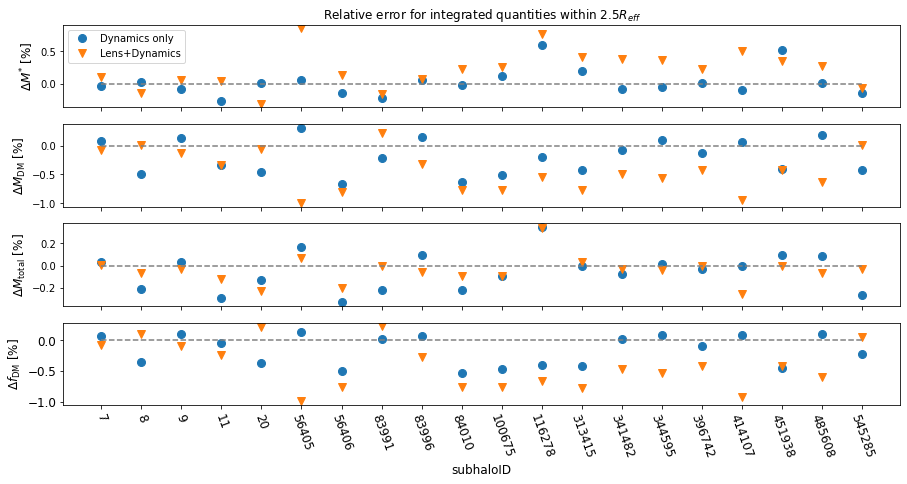

In [7]:
fig, axes = plt.subplots(4, figsize=(15, 7), sharex=True)
labels = [r"${\Delta M^{*}}$ [%]", r"${\Delta M_{\rm DM}}$ [%]",
         r"${\Delta M_{\rm total}}$ [%]", r"${\Delta f_{\rm DM}}$ [%]" ]


for i in range(len(labels)):
    ax = axes[i]
    ax.set_xticks(x, subhalos)
    ax.plot(x, results[i][:,0], "o", label="Dynamics only", markersize=8)
    ax.plot(x, results[i][:,1], "v", label="Lens+Dynamics", markersize=8)
    ax.hlines(y=0, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")
    ax.set_ylabel(labels[i], size=12)
    #ax.yaxis.set_label_coords(-0.1, 0.5)

axes[0].set_title("Relative error for integrated quantities within ${2.5 R_{eff}}$")
axes[0].legend()
axes[-1].set_xlabel("subhaloID", size=12)
plt.xticks(size=12, rotation=-70)
plt.yticks(size=12);

---

# R$_{\text{Einstein}}$

In [8]:
# Column 0 for Jam result, Column 1 for dyLens 
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)  # Number of subhalos


Dstar  = np.empty([Nsubhalos,2])   # Fractional difference in stellar mass
Ddm    = np.empty([Nsubhalos,2])   # Fractional difference in dm mass
Dtotal = np.empty([Nsubhalos,2])   # Fractional difference in total mass
Dfdm   = np.empty([Nsubhalos,2])   # Fractional difference in dm fraction

Mstar  = np.empty([Nsubhalos]) # "True" stellar mass
Mdm    = np.empty([Nsubhalos]) # "True" dm mass
Mtotal = np.empty([Nsubhalos]) # "True" total mass

In [9]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/JAM/Analysis_Re/quantities.json".format(idNum)) as f:
        jam = json.load(f)
        f.close()

    with open("./{}/model1/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        dyLens = json.load(f)
        f.close()
    
    Dstar[i][0] = jam["Dstar"]
    Dstar[i][1] = dyLens["Dstar"]
    
    Ddm[i][0] = jam["Ddm"]
    Ddm[i][1] = dyLens["Ddm"]
    
    Dtotal[i][0] = jam["Dtotal"]
    Dtotal[i][1] = dyLens["Dtotal"]
    
    Dfdm[i][0] = jam["Dfdm"]
    Dfdm[i][1] = dyLens["Dfdm"]
    
    Mstar[i]  = dyLens["Mstar"]
    Mdm[i]    = dyLens["Mdm"]
    Mtotal[i] = dyLens["Mtotal"] 
    

In [10]:
results = np.stack([Dstar, Ddm, Dtotal, Dfdm])

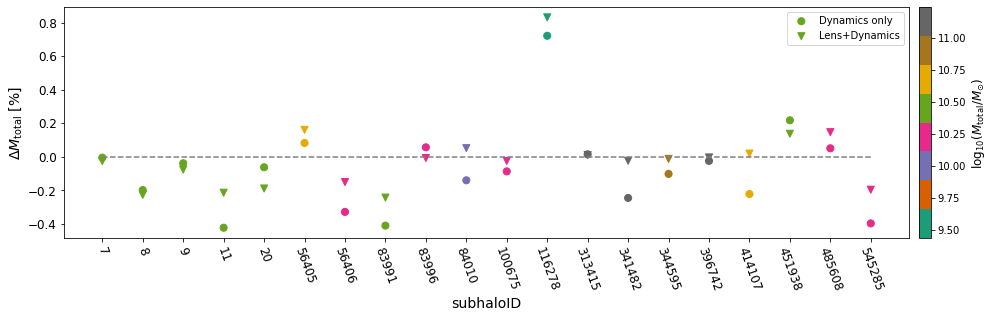

In [11]:
x = np.arange(0, Nsubhalos, 1)   # just to plot
plt.figure(figsize=(15,4))
cmap = "Dark2"
plt.xticks(x, subhalos)
plt.scatter(x, Dtotal[:,0], marker="o", s=50, c=Mtotal, label="Dynamics only", cmap=cmap)
plt.scatter(x, Dtotal[:,1], marker="v", s=50, c=Mtotal, label="Lens+Dynamics", cmap=cmap)

plt.hlines(y=0, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")

plt.legend()
plt.ylabel(r"${\Delta M_{\rm total}}$ [%]", size=14)
plt.xlabel("subhaloID", size=14)
plt.colorbar(pad=0.01).set_label(label=r"${\log_{10}(M_{\rm total}/M_{\odot})}$", size=12)
plt.tight_layout()
plt.xticks(size=12, rotation=-70)
plt.yticks(size=12)
plt.show()

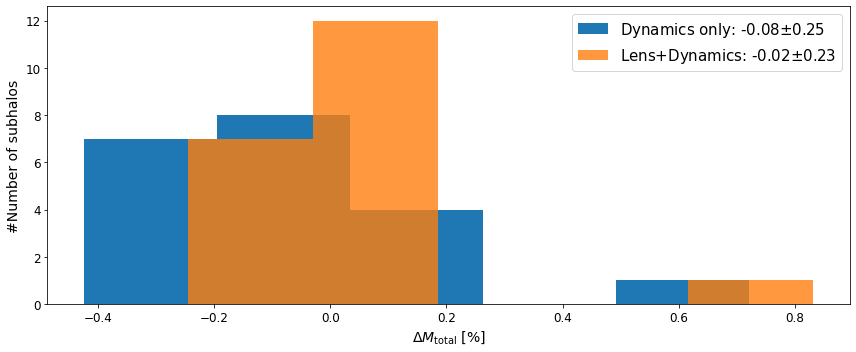

In [12]:
plt.figure(figsize=(12,5))
_ = plt.hist(Dtotal[:,0], bins=5, density=False, 
             label="Dynamics only: {:.2f}$\pm${:.2f}".format(np.median(Dtotal[:,0]) , np.std(Dtotal[:,0])))
_ = plt.hist(Dtotal[:,1], bins=5, density=False, alpha=0.8, 
             label="Lens+Dynamics: {:.2f}$\pm${:.2f}".format(np.median(Dtotal[:,1]) , np.std(Dtotal[:,1])) )

plt.legend(fontsize=15)
plt.xlabel(r"${\Delta M_{\rm total}}$ [%]", size=14)
plt.ylabel("#Number of subhalos", size=14)

plt.xticks(size=12)
plt.yticks(size=12)
plt.tight_layout()

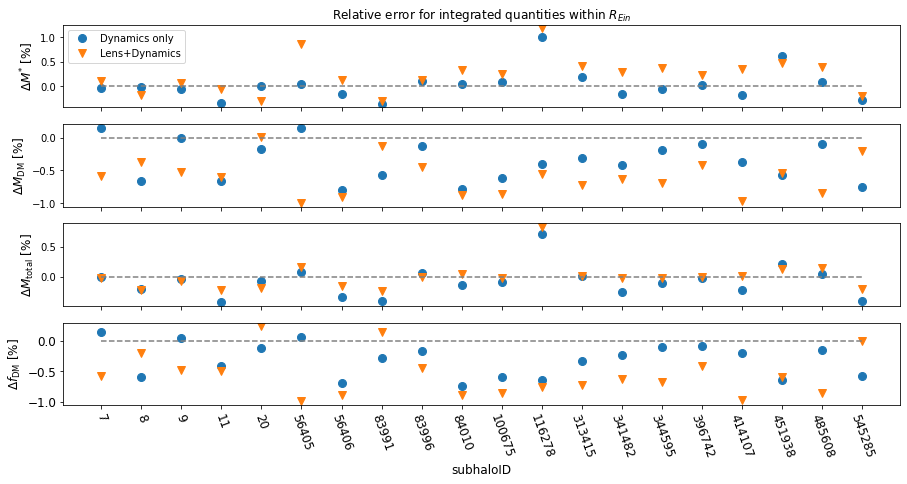

In [13]:
fig, axes = plt.subplots(4, figsize=(15, 7), sharex=True)
labels = [r"${\Delta M^{*}}$ [%]", r"${\Delta M_{\rm DM}}$ [%]",
         r"${\Delta M_{\rm total}}$ [%]", r"${\Delta f_{\rm DM}}$ [%]" ]


for i in range(len(labels)):
    ax = axes[i]
    ax.set_xticks(x, subhalos)
    ax.plot(x, results[i][:,0], "o", label="Dynamics only", markersize=8)
    ax.plot(x, results[i][:,1], "v", label="Lens+Dynamics", markersize=8)
    ax.hlines(y=0, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")
    ax.set_ylabel(labels[i], size=12)
    #ax.yaxis.set_label_coords(-0.1, 0.5)

axes[0].set_title("Relative error for integrated quantities within ${R_{Ein}}$")
axes[0].legend()
axes[-1].set_xlabel("subhaloID", size=12)
plt.xticks(size=12, rotation=-70)
plt.yticks(size=12);

----